In [1]:
import pandas as pd
import numpy as np

# Load feature-engineered data
X = pd.read_csv('data/features_X.csv', index_col=0, parse_dates=True)
y = pd.read_csv('data/target_y.csv', index_col=0, parse_dates=True)

X.shape, y.shape


((3702, 21), (3702, 1))

In [2]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X.iloc[:train_size]
X_val   = X.iloc[train_size:train_size + val_size]
X_test  = X.iloc[train_size + val_size:]

y_train = y.iloc[:train_size]
y_val   = y.iloc[train_size:train_size + val_size]
y_test  = y.iloc[train_size + val_size:]


In [3]:
X_train.shape, X_val.shape, X_test.shape


((2591, 21), (555, 21), (556, 21))

In [4]:
def create_sequences(X, y, lookback=24):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X.iloc[i:i+lookback].values)
        ys.append(y.iloc[i+lookback].values)
    return np.array(Xs), np.array(ys)


In [5]:
lookback = 24

X_train_seq, y_train_seq = create_sequences(X_train, y_train, lookback)
X_val_seq, y_val_seq     = create_sequences(X_val, y_val, lookback)
X_test_seq, y_test_seq   = create_sequences(X_test, y_test, lookback)


In [6]:
X_train_seq.shape
y_train_seq.shape


(2567, 1)

In [7]:
X_train_seq.shape


(2567, 24, 21)

In [8]:
y_train_seq.shape

(2567, 1)

In [9]:
import tensorflow as tf
tf.__version__


C:\Users\keert\SmartEnergyProject\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


'2.20.0'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,081 (86.25 KB)

 Trainable params: 22,081 (86.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    verbose=1
)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - val_loss: 6.7755e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 8.2040e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 7.5723e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 6.0406e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 6.0252e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.6354e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.4248e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.8083e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.9675e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 6.5091e-04
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━

In [13]:
model_epochs10 = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model_epochs10.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

history_epochs10 = model_epochs10.fit(
    X_train_seq,
    y_train_seq,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    verbose=1
)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - val_loss: 7.7540e-04
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - val_loss: 6.2561e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 7.2893e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 6.8679e-04
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 6.8113e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 6.6853e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - val_loss: 5.9143e-04
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - val_loss: 5.9737e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.5872e-04
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 0.0012


In [14]:
y_test_lstm_pred = model.predict(X_test_seq)
y_test_lstm_pred[:5]


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[0.03119367],
       [0.03121022],
       [0.0295783 ],
       [0.03628199],
       [0.0261817 ]], dtype=float32)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lstm_mae = mean_absolute_error(y_test_seq, y_test_lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, y_test_lstm_pred))

lstm_mae, lstm_rmse


(0.02599476497875718, np.float64(0.04007734213200212))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_test_lr_pred = lr_model.predict(X_test)


In [19]:
test_mae = mean_absolute_error(y_test, y_test_lr_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_lr_pred))

test_mae, test_rmse


(0.013068187786042806, np.float64(0.02549379676797534))

In [20]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM'],
    'MAE': [test_mae, lstm_mae],
    'RMSE': [test_rmse, lstm_rmse]
})

comparison


,Model,MAE,RMSE
0,Linear Regression,0.013068,0.025494
1,LSTM,0.025995,0.040077


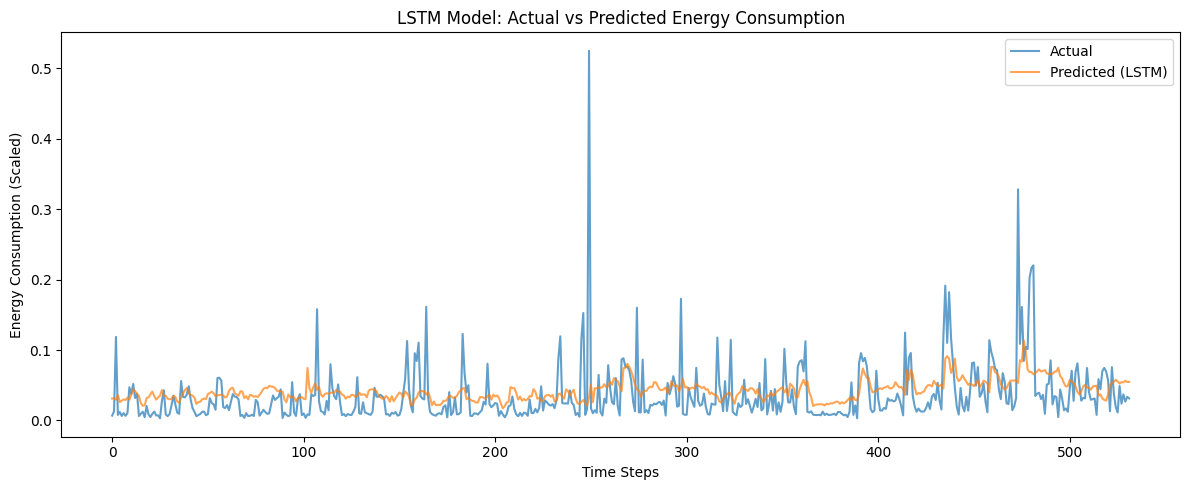

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_seq, label='Actual', alpha=0.7)
plt.plot(y_test_lstm_pred, label='Predicted (LSTM)', alpha=0.7)
plt.title('LSTM Model: Actual vs Predicted Energy Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption (Scaled)')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Align Linear Regression predictions with LSTM test data
y_test_lr_aligned = y_test_lr_pred[-len(y_test_lstm_pred):]


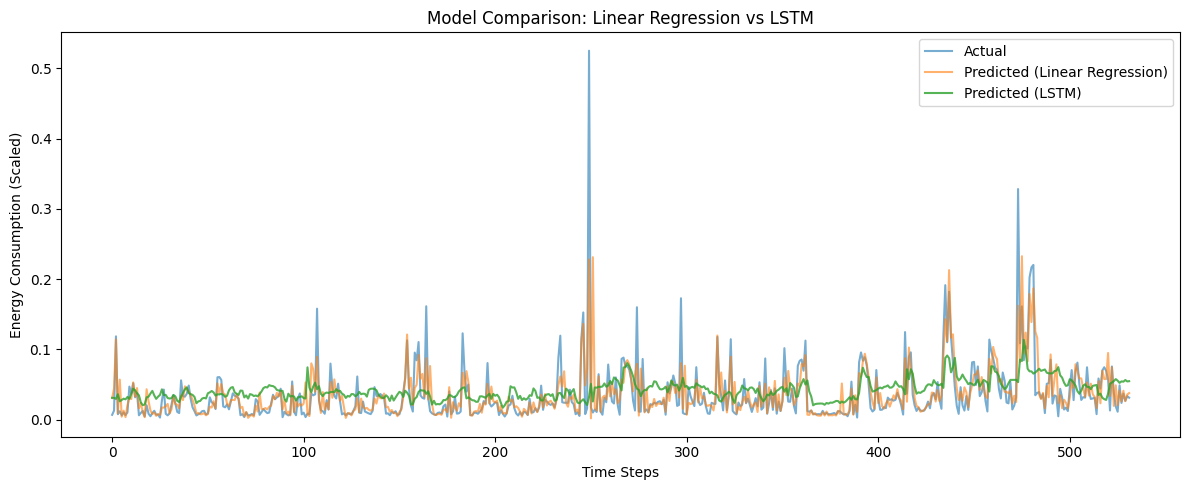

In [23]:
plt.figure(figsize=(12,5))
plt.plot(y_test_seq, label='Actual', alpha=0.6)
plt.plot(y_test_lr_aligned, label='Predicted (Linear Regression)', alpha=0.6)
plt.plot(y_test_lstm_pred, label='Predicted (LSTM)', alpha=0.8)
plt.title('Model Comparison: Linear Regression vs LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption (Scaled)')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [27]:
#Evaluate LINEAR REGRESSION
lr_mae = mean_absolute_error(y_test, y_test_lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_lr_pred))
lr_r2 = r2_score(y_test, y_test_lr_pred)

lr_mae, lr_rmse, lr_r2


(0.013068187786042806, np.float64(0.02549379676797534), 0.6256639142108098)

In [28]:
#Evaluate LINEAR REGRESSION
lstm_mae = mean_absolute_error(y_test_seq, y_test_lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, y_test_lstm_pred))
lstm_r2 = r2_score(y_test_seq, y_test_lstm_pred)

lstm_mae, lstm_rmse, lstm_r2


(0.02599476497875718, np.float64(0.04007734213200212), 0.09369877068393984)

In [29]:
#Create evaluation summary table
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM'],
    'MAE': [lr_mae, lstm_mae],
    'RMSE': [lr_rmse, lstm_rmse],
    'R2 Score': [lr_r2, lstm_r2]
})

evaluation


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.013068,0.025494,0.625664
1,LSTM,0.025995,0.040077,0.093699


In [31]:
model.save("lstm_energy_model.keras")


In [32]:
import os
os.listdir()


['.ipynb_checkpoints',
 '01_Data_Analysis.ipynb',
 '02_Feature_Engineering.ipynb',
 '03_Baseline_Model.ipynb',
 '04_LSTM_Model.ipynb',
 'data',
 'lstm_energy_model.keras',
 'notebooks',
 'venv']

In [33]:
from tensorflow.keras.models import load_model

lstm_model = load_model("lstm_energy_model.keras")


In [34]:
import numpy as np

def predict_energy_lstm(input_sequence):
    """
    input_sequence: numpy array of shape (1, 24, 21)
    returns: predicted energy value
    """
    prediction = lstm_model.predict(input_sequence)
    return float(prediction[0][0])


In [35]:
# Take one sample from test data
sample_input = X_test_seq[0].reshape(1, 24, 21)


In [36]:
predicted_energy = predict_energy_lstm(sample_input)
predicted_energy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


0.03119366616010666

In [37]:
# Test predictions on a few samples
for i in range(3):
    sample_input = X_test_seq[i].reshape(1, 24, 21)
    prediction = predict_energy_lstm(sample_input)
    print(f"Sample {i+1} predicted energy: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Sample 1 predicted energy: 0.03119366616010666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sample 2 predicted energy: 0.031210221350193024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Sample 3 predicted energy: 0.029578303918242455


In [38]:
actual_value = y_test_seq[0][0]
predicted_value = predict_energy_lstm(X_test_seq[0].reshape(1, 24, 21))

actual_value, predicted_value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


(np.float64(0.0069270271172484), 0.03119366616010666)